For this case study, you will perform a classification task on a WiFi dataset. You will use WLAN fingerprints to identify the location of a user. You will identify locations using the building numbers and floor numbers only. 

You will also explore the question, "is more data useful for a classification task?"

The dataset you will use can be found on: https://archive.ics.uci.edu/ml/datasets/ujiindoorloc .

**\[Step 1\]** Once you examine the data sets, you will find that there is a training set and a validation set. However, you must also create a test set that has the same number of samples as the validation set. You can select and remove random samples from the training set and use them to create a test set. The test set should not be used in the training process or to optimize the parameters of any algorithm you use. The test set should only be used to report the final performance of a model whenever necessary.

You may need to determine the features and labels of your model. You can also do some engineering on features and labels if necessary.

**\[Step 2\]** But, which algorithm should you use with your model? You can refer to the scikit-learn cheat sheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html, and try three algorithms. Some suggestions are: LinearSVC, Logistic Regression, KNN classifier, SVC, Random Forest (as an example of Ensemble Learning) etc. Perform one experiment using each and observe the performance of each model. Note which is the best performing model.

**\[Step 3\]** Once the previous step is done, observe if more data is useful for a classification task. For this, randomly select 20% of the training samples, but keep the size of the test set the same. You wil not use the validation set in this step as you will not optimize the model in any way. Note the performance. Then also try with 40%, 60%, 80% and 100% of the training samples. Perform three experiments for each selection. This means, for 20% you will do three experiments, 40% three experiments etc. Find the average of three experiments for each selection and plot them using a method of your choice.

**\[Step 4\]** Publish your finding in presentation slides. Like case study 1, three of you will be randomly chosen to present your work in front of the class. The slides should inform the audience about:

* the objective of the case study
* the data (features and labels)
* things you have done (e.g. why you selected a specific classification model)
* challenges you have faced that might be interesting to your classmates
* your findings


**Things to note**:

* **Type of task**: classification
* **Features**: you choose
* **Feature engineering**: You are welcome to do so.
* **Labels**: User locations. Use building and floor IDs, but ignore the SPACEID column.

* In some cases, normalization may result in reduced accuracy.
* You must write enough comments so that anybody with some programming knowledge can understand your code.

Also,
* This is not a group project. But if you think you will benefit from working with a partner, you are welcome to find a partner. No points will be deducted if you choose to do so. However, you must inform Himan (the TA) and me (Prof. Ghoshal) by **September 25, 2023** in that case.


**Grading Criteria**:

* [15 + 15] Data set preparation: Choosing your $X$ (features) and $y$ (label). Feature Engineering.
* [15 + 15 + 15] Three experiments using three algorithms.  
* [15] Observing the effects of more data using five sets of random samples of different sizes from the training set. 
* [10] Presentation slides and presentation.

**What to submit**:

Put the Jupyter Notebook file and the .csv file in a folder. Then convert your presentation slides to a PDF file and put it in the same folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be firstname_lastname_casestudy_2.zip . Upload the .zip file on Canvas.

In [1]:
# importing necessary libraries 
import numpy as np  #used for plotting 
import pandas as pd #used for dataset manipulation
from sklearn.preprocessing import StandardScaler #used for standardization in kth nearest neighbors model
from sklearn import model_selection #used for cross validation steps
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split # used for splitting the training data and testing data
#import seaborn as sns 
import matplotlib.pyplot as plt #used for scatter plot average of training sets
from sklearn.metrics import accuracy_score #used to print accuracy of models

# Step 1

In [2]:
#load entire dataset 
whole_data = pd.read_csv('trainingData.csv') #contains the entire training data set unfiltered and before the split
data_validate = pd.read_csv('validationData.csv') # contains the entire validation data set unfiltered 
whole_data_backup = whole_data.copy()  #after loading all the data saving a backup variable to store it whole 
#whole_data # <- printing to ensure that data was brought in properly, now lets start thinking about features vs target

In [3]:
#steps to understand the data better before feature engineering
whole_data.describe() 

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [4]:
#steps to understand the data better before feature engineering
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [5]:
#After further analysis: 100 means nothing detected, -104 means poorest signal, 0 means strongest signal

#only want to use WAPs as my features since these indicate range
WAP_columns = whole_data.columns[:520]  #storing the first 520 columns from the training set since these contain the 520 WAPs

#since -104 is poorest signal, replace 100 values with -105 to show no signal
whole_data[WAP_columns] = whole_data[WAP_columns].replace(100, -105)

#to narrow down to one target instead of 2, combine the two attributes into a string: BUILDINGID_FLOOR
#defining this as the target (Y)
target = whole_data['BUILDINGID'].astype(str) + '_' + whole_data['FLOOR'].astype(str)

#defining feature (x)
features = whole_data[WAP_columns]

target.unique() #checking what unique values we have in our target (i.e the combination of building id vs floors- there are 13)

array(['1_2', '0_0', '2_3', '2_2', '2_4', '1_0', '1_1', '2_1', '1_3',
       '2_0', '0_2', '0_1', '0_3'], dtype=object)

In [6]:
WAP_col = data_validate.columns[:520] 
#since -104 is lowest, replace 100 values with -105 to show no signal
data_validate[WAP_col] = data_validate[WAP_col].replace(100, -105)

#to narrow down to one target instead of 2, combine the two attributes into a string: BUILDINGID_FLOOR
#defining this as the target (y)
val_target = data_validate['BUILDINGID'].astype(str) + '_' + data_validate['FLOOR'].astype(str)

#defining feature (x)
val_feature = data_validate[WAP_col]

In [7]:
#split dataset features and target into a test set and training set, using 0.0557 as test size so there will be 1111 = validation size
SEED = 0   #use this value to reproduce the same random selection 
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.0557, random_state=SEED)

In [8]:
#understanding shape of input data to prep for classification model 
print("test shape", features_test.shape)
print("train shape", features_train.shape)
#step 1 complete 

test shape (1111, 520)
train shape (18826, 520)


# Step 2: picking 3 machine learning models: SVC, KNN, Random Forest 

Random Forest 

In [9]:
#start with random forest classifier: 
from sklearn.ensemble import RandomForestClassifier #gives access to library with needed algorithms/functions

#rfc will be the random forest classifier 
#since random forest uses random subset, set the random state to a specific value to make results reproducable 
rfc = RandomForestClassifier(n_estimators=13, random_state=SEED) #used 13 as n_estimators since we have 13 unique target values, tested different options and this had highest accuracy
rfc.fit(features_train, target_train) #training model on training dataset

rfc_predict_target = rfc.predict(features_test) #testing model on test set, tries to predict targets for given features 

In [10]:
#testing accuracy of rfc:
from sklearn.metrics import classification_report #import class for a full report of model's performance

print(classification_report(target_test,rfc_predict_target)) #print full report of model's performance and analyze results 

accuracy = accuracy_score(target_test, rfc_predict_target) #calculate exact accuracy of model (this value won't be rounded to 2 decimal places)
print(accuracy) 
#accuracy looks high across all, no need to further tune 

              precision    recall  f1-score   support

         0_0       1.00      0.97      0.98        66
         0_1       0.96      1.00      0.98        71
         0_2       1.00      0.99      0.99        74
         0_3       1.00      0.99      0.99        82
         1_0       1.00      1.00      1.00        80
         1_1       1.00      1.00      1.00        96
         1_2       1.00      1.00      1.00        86
         1_3       0.90      1.00      0.95        52
         2_0       1.00      0.96      0.98       112
         2_1       0.99      1.00      1.00       109
         2_2       1.00      0.99      0.99        94
         2_3       1.00      1.00      1.00       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.990999099909991


In [11]:
#cross validation for rfc
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(rfc, val_feature, val_target, cv=5) #5 fold cross validation used to tune the model 
print("Cross Validation Score:", scores.mean())
#pretty good cross validation score, no need to further tune

Cross Validation Score: 0.8433967599886882


Kth Nearest Neighbor

In [12]:
# 2nd model: kth nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier #gives access to library with needed algorithms/functions

stdscale = StandardScaler() #instance of standardScaler class to standardize features 
stdscale.fit(features_train) #fit using standard deviation and mean of features  

#standardize features and target values as defined by the standardScaler class:
features_train = stdscale.transform(features_train) 
features_test = stdscale.transform(features_test)

knc = KNeighborsClassifier()
knc.fit(features_train, target_train) #training model on training set 

knc_predict_target = knc.predict(features_test) #testing model by predicting target values of test set

In [13]:
print(classification_report(target_test, knc_predict_target))
#accuracy looks good no need to further tune model

              precision    recall  f1-score   support

         0_0       0.98      0.98      0.98        66
         0_1       0.97      0.97      0.97        71
         0_2       0.96      0.96      0.96        74
         0_3       0.98      0.98      0.98        82
         1_0       1.00      1.00      1.00        80
         1_1       1.00      1.00      1.00        96
         1_2       0.99      1.00      0.99        86
         1_3       1.00      0.96      0.98        52
         2_0       0.98      1.00      0.99       112
         2_1       0.97      0.95      0.96       109
         2_2       0.98      0.97      0.97        94
         2_3       0.98      0.99      0.99       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111



In [14]:
#cross validation for knn tuning
#defining target (y)
#knc_scores = cross_val_score(knc, val_feature, val_feature, cv=5)
# Print the cross-validation scores
#print("Cross-validation scores:", knc_scores)
#print("Mean cross-validation score:", knc_scores.mean())

In [15]:
#testing whether this would increase accuracy 
#knc1 = KNeighborsClassifier(n_neighbors=8)
#knc1.fit(features_train, target_train)

#knc_predict_target1 = knc1.predict(features_test)
#print(classification_report(target_test, knc_predict_target1))

SVC 

In [16]:
# 3rd model: SVC
from sklearn.svm import SVC #gives access to library with needed algorithms/functions

svc = SVC(kernel='linear') #set to linear since there should be straight line boundaries between classification types(target values)
svc.fit(features_train, target_train) #train model on training set 

svc_predict_target = svc.predict(features_test) #test model by predicting associated test target values

In [17]:
print(classification_report(target_test,svc_predict_target))
accuracy = accuracy_score(target_test, svc_predict_target)
print(accuracy)
#accuracy looks great no need to further tune model

              precision    recall  f1-score   support

         0_0       0.98      0.98      0.98        66
         0_1       0.99      0.99      0.99        71
         0_2       0.99      1.00      0.99        74
         0_3       1.00      0.99      0.99        82
         1_0       1.00      0.99      0.99        80
         1_1       0.99      1.00      0.99        96
         1_2       0.99      1.00      0.99        86
         1_3       0.91      0.98      0.94        52
         2_0       1.00      0.96      0.98       112
         2_1       1.00      1.00      1.00       109
         2_2       1.00      1.00      1.00        94
         2_3       1.00      1.00      1.00       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.990999099909991


In [18]:
#cross validation 
svcscores = cross_val_score(svc, val_feature, val_target, cv=5)
print("Cross Validation Score:", svcscores.mean())
#cross validation score looks good no need to further tune 

Cross Validation Score: 0.8955803336969256


# Result from step 2: the best algorithm for this data set is SVC due to it's high accuracy on test data and high cross validation mean score

# Step 3: 20%, 40%, 60%, 80%, 100% of Test Set

Using only 20% of data for testing:

In [19]:
# using 20% of the dataset: 
#randomly select 20% of training data to be included 
feature_train20, feature_test20, target_train20, target_test20 = train_test_split(features, target, test_size=0.0557, train_size=0.2, random_state=SEED)
print("test shape", feature_test20.shape)
print("train shape", feature_train20.shape)
#ensuring correct number of values 

test shape (1111, 520)
train shape (3987, 520)


In [20]:
#random forest model on 20% of the data:
#repeat steps from earlier excluding cross validation on smaller training set 
rfc20 = RandomForestClassifier(n_estimators=13, 
                             random_state=SEED)
rfc20.fit(feature_train20, target_train20)

rfc20_predict_target = rfc20.predict(feature_test20)

print(classification_report(target_test20,rfc20_predict_target))
accuracyrfc20 = accuracy_score(target_test20, rfc20_predict_target)
print(accuracyrfc20)

              precision    recall  f1-score   support

         0_0       0.98      0.97      0.98        66
         0_1       0.95      0.97      0.96        71
         0_2       0.97      0.97      0.97        74
         0_3       1.00      0.98      0.99        82
         1_0       0.99      0.97      0.98        80
         1_1       0.98      0.99      0.98        96
         1_2       0.99      1.00      0.99        86
         1_3       0.98      0.96      0.97        52
         2_0       0.99      0.99      0.99       112
         2_1       0.97      1.00      0.99       109
         2_2       1.00      0.93      0.96        94
         2_3       0.95      1.00      0.98       139
         2_4       1.00      0.96      0.98        50

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111

0.9792979297929792


In [21]:
# kth nearest neighbors (KNN) on 20% of data:
#repeat steps from earlier excluding cross validation on smaller training set 
stdscale.fit(feature_train20)
feature_train20 = stdscale.transform(feature_train20)
feature_test20 = stdscale.transform(feature_test20)

knc20 = KNeighborsClassifier()
knc20.fit(feature_train20, target_train20)

knc20_predict_target = knc20.predict(feature_test20)

print(classification_report(target_test20, knc20_predict_target))
accuracy20knn = accuracy_score(target_test20, knc20_predict_target)
print(accuracy20knn)

              precision    recall  f1-score   support

         0_0       0.97      0.95      0.96        66
         0_1       0.93      0.94      0.94        71
         0_2       0.90      0.95      0.92        74
         0_3       0.97      0.93      0.95        82
         1_0       0.92      0.99      0.95        80
         1_1       0.99      0.94      0.96        96
         1_2       0.99      0.98      0.98        86
         1_3       0.98      0.96      0.97        52
         2_0       0.97      1.00      0.99       112
         2_1       0.98      0.94      0.96       109
         2_2       0.95      0.98      0.96        94
         2_3       0.96      0.98      0.97       139
         2_4       1.00      0.96      0.98        50

    accuracy                           0.96      1111
   macro avg       0.96      0.96      0.96      1111
weighted avg       0.96      0.96      0.96      1111

0.9621962196219622


In [22]:
# svc on 20% of data:
#repeat steps from earlier excluding cross validation on smaller training set 
svc20 = SVC(kernel='linear')
svc20.fit(feature_train20, target_train20)

svc20_predict_target = svc20.predict(feature_test20)

print(classification_report(target_test20,svc20_predict_target))
accuracysvc20 = accuracy_score(target_test20, svc20_predict_target)
print(accuracysvc20)

              precision    recall  f1-score   support

         0_0       0.96      0.97      0.96        66
         0_1       0.96      0.96      0.96        71
         0_2       0.99      0.99      0.99        74
         0_3       1.00      0.99      0.99        82
         1_0       1.00      0.99      0.99        80
         1_1       0.99      1.00      0.99        96
         1_2       0.99      0.99      0.99        86
         1_3       0.98      0.96      0.97        52
         2_0       0.99      0.99      0.99       112
         2_1       0.99      1.00      1.00       109
         2_2       1.00      1.00      1.00        94
         2_3       1.00      1.00      1.00       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.9891989198919892


Mean accuracy for all three experiments using 20% of data for training

In [23]:
# computing mean accuracy score for using 20% of data to train
average20 = (accuracyrfc20 + accuracy20knn + accuracysvc20) / 3
print(average20)

0.9768976897689768


Using only 40% of data for testing:

In [24]:
# using 40% of the dataset:
#randomly select 40% of training data to be included 
feature_train40, feature_test40, target_train40, target_test40 = train_test_split(features, target, test_size=0.0557, train_size=0.4, random_state=SEED)

print("test shape", feature_test40.shape)
print("train shape", feature_train40.shape)
#ensuring correct number of values 

test shape (1111, 520)
train shape (7974, 520)


In [25]:
#random forest model on 40% of the data
rfc40 = RandomForestClassifier(n_estimators=13, 
                             random_state=SEED)
rfc40.fit(feature_train40, target_train40)

rfc40_predict_target = rfc40.predict(feature_test40)

print(classification_report(target_test40,rfc40_predict_target))
accuracyrfc40 = accuracy_score(target_test40, rfc40_predict_target)
print(accuracyrfc40)

              precision    recall  f1-score   support

         0_0       0.98      0.97      0.98        66
         0_1       0.97      1.00      0.99        71
         0_2       0.99      0.99      0.99        74
         0_3       1.00      0.99      0.99        82
         1_0       0.99      1.00      0.99        80
         1_1       1.00      0.99      0.99        96
         1_2       0.99      1.00      0.99        86
         1_3       0.91      0.98      0.94        52
         2_0       1.00      0.96      0.98       112
         2_1       0.98      1.00      0.99       109
         2_2       1.00      0.98      0.99        94
         2_3       0.99      1.00      1.00       139
         2_4       1.00      0.98      0.99        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.9873987398739874


In [26]:
# kth nearest neighbors (KNN) on 40% of data
stdscale.fit(feature_train40)
feature_train40 = stdscale.transform(feature_train40)
feature_test40 = stdscale.transform(feature_test40)

knc40 = KNeighborsClassifier()
knc40.fit(feature_train40, target_train40)

knc40_predict_target = knc40.predict(feature_test40)

print(classification_report(target_test40, knc40_predict_target))
accuracyknc40 = accuracy_score(target_test40, knc40_predict_target)
print(accuracyknc40)

              precision    recall  f1-score   support

         0_0       0.98      0.97      0.98        66
         0_1       0.95      0.99      0.97        71
         0_2       0.93      0.95      0.94        74
         0_3       0.96      0.93      0.94        82
         1_0       1.00      1.00      1.00        80
         1_1       1.00      1.00      1.00        96
         1_2       0.97      1.00      0.98        86
         1_3       1.00      0.94      0.97        52
         2_0       0.98      1.00      0.99       112
         2_1       0.99      0.93      0.96       109
         2_2       0.94      0.98      0.96        94
         2_3       0.98      0.99      0.98       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.97      1111
   macro avg       0.98      0.97      0.97      1111
weighted avg       0.98      0.97      0.97      1111

0.9747974797479748


In [27]:
# svc on 40% of data
svc40 = SVC(kernel='linear')
svc40.fit(feature_train40, target_train40)

svc40_predict_target = svc40.predict(feature_test40)

print(classification_report(target_test40,svc40_predict_target))
accuracysvc40 = accuracy_score(target_test40, svc40_predict_target)
print(accuracysvc40)

              precision    recall  f1-score   support

         0_0       0.96      0.98      0.97        66
         0_1       0.99      0.96      0.97        71
         0_2       0.97      0.99      0.98        74
         0_3       1.00      0.99      0.99        82
         1_0       1.00      0.99      0.99        80
         1_1       0.99      1.00      0.99        96
         1_2       0.99      1.00      0.99        86
         1_3       1.00      0.96      0.98        52
         2_0       0.99      1.00      1.00       112
         2_1       1.00      0.99      1.00       109
         2_2       0.98      0.98      0.98        94
         2_3       0.99      0.99      0.99       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.9882988298829883


Mean accuracy for all three experiments using 40% of data for training

In [28]:
# computing mean accuracy score for using 40% of data to train
average40 = (accuracyrfc40 + accuracyknc40 + accuracysvc40) / 3
print(average40)

0.9834983498349835


Using only 60% of data for testing:

In [29]:
# using 60% of the dataset 
#randomly select 60% of training data to be included 
feature_train60, feature_test60, target_train60, target_test60 = train_test_split(features, target, test_size=0.0557, train_size=0.6, random_state=SEED)

print("test shape", feature_test60.shape)
print("train shape", feature_train60.shape)
#ensuring correct number of values

test shape (1111, 520)
train shape (11962, 520)


In [30]:
#random forest model on 60% of the data
rfc60 = RandomForestClassifier(n_estimators=13, 
                             random_state=SEED)
rfc60.fit(feature_train60, target_train60)

rfc60_predict_target = rfc60.predict(feature_test60)

print(classification_report(target_test60,rfc60_predict_target))
accuracyrfc60 = accuracy_score(target_test60, rfc60_predict_target)
print(accuracyrfc60)

              precision    recall  f1-score   support

         0_0       0.98      0.95      0.97        66
         0_1       0.95      0.99      0.97        71
         0_2       1.00      0.99      0.99        74
         0_3       1.00      1.00      1.00        82
         1_0       1.00      0.99      0.99        80
         1_1       0.99      1.00      0.99        96
         1_2       0.99      1.00      0.99        86
         1_3       0.91      0.98      0.94        52
         2_0       0.99      0.96      0.97       112
         2_1       1.00      0.99      1.00       109
         2_2       1.00      1.00      1.00        94
         2_3       1.00      1.00      1.00       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.9882988298829883


In [31]:
# kth nearest neighbors (KNN) on 60% of data
stdscale.fit(feature_train60)
feature_train60 = stdscale.transform(feature_train60)
feature_test60 = stdscale.transform(feature_test60)

knc60 = KNeighborsClassifier()
knc60.fit(feature_train60, target_train60)

knc60_predict_target = knc60.predict(feature_test60)

print(classification_report(target_test60, knc60_predict_target))
accuracyknc60 = accuracy_score(target_test60, knc60_predict_target)
print(accuracyknc60)

              precision    recall  f1-score   support

         0_0       0.98      0.98      0.98        66
         0_1       0.96      0.97      0.97        71
         0_2       0.96      0.96      0.96        74
         0_3       0.98      0.96      0.97        82
         1_0       1.00      1.00      1.00        80
         1_1       1.00      1.00      1.00        96
         1_2       0.97      1.00      0.98        86
         1_3       1.00      0.94      0.97        52
         2_0       0.97      1.00      0.99       112
         2_1       0.99      0.94      0.97       109
         2_2       0.97      0.98      0.97        94
         2_3       0.98      0.99      0.98       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111

0.9801980198019802


In [32]:
#svc on 60% of data
svc60 = SVC(kernel='linear')
svc60.fit(feature_train60, target_train60)

svc60_predict_target = svc60.predict(feature_test60)

print(classification_report(target_test60,svc60_predict_target))
accuracysvc60 = accuracy_score(target_test60, svc60_predict_target)
print(accuracysvc60)

              precision    recall  f1-score   support

         0_0       0.98      0.97      0.98        66
         0_1       0.96      0.96      0.96        71
         0_2       0.96      0.99      0.97        74
         0_3       1.00      0.99      0.99        82
         1_0       1.00      0.99      0.99        80
         1_1       0.99      1.00      0.99        96
         1_2       0.99      1.00      0.99        86
         1_3       0.91      0.98      0.94        52
         2_0       1.00      0.96      0.98       112
         2_1       1.00      0.99      1.00       109
         2_2       0.98      0.99      0.98        94
         2_3       0.99      0.99      0.99       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.99      0.98      0.98      1111

0.9846984698469847


Mean accuracy for all three experiments using 60% of data for training

In [33]:
# computing mean accuracy score for using 60% of data to train
average60 = (accuracyrfc60 + accuracyknc60 + accuracysvc60) / 3
print(average60)

0.9843984398439845


Using only 80% of data for testing:

In [34]:
# using 80% of the dataset 
#randomly select 20% of training data to be included 
feature_train80, feature_test80, target_train80, target_test80 = train_test_split(features, target, test_size=0.0557, train_size=0.8, random_state=SEED)

print("test shape", feature_test80.shape)
print("train shape", feature_train80.shape)
#ensuring correct number of values

test shape (1111, 520)
train shape (15949, 520)


In [35]:
#random forest model on 80% of the data
rfc80 = RandomForestClassifier(n_estimators=13, 
                             random_state=SEED)
rfc80.fit(feature_train80, target_train80)

rfc80_predict_target = rfc80.predict(feature_test80)

print(classification_report(target_test80,rfc80_predict_target))
accuracyrfc80 = accuracy_score(target_test80, rfc80_predict_target)
print(accuracyrfc80)

              precision    recall  f1-score   support

         0_0       1.00      0.97      0.98        66
         0_1       0.97      1.00      0.99        71
         0_2       0.99      1.00      0.99        74
         0_3       1.00      0.99      0.99        82
         1_0       0.99      1.00      0.99        80
         1_1       1.00      0.99      0.99        96
         1_2       1.00      1.00      1.00        86
         1_3       0.91      1.00      0.95        52
         2_0       1.00      0.96      0.98       112
         2_1       1.00      1.00      1.00       109
         2_2       1.00      1.00      1.00        94
         2_3       1.00      1.00      1.00       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.991899189918992


In [36]:
# kth nearest neighbors (KNN) on 80% of data
stdscale.fit(feature_train80)
feature_train80 = stdscale.transform(feature_train80)
feature_test80 = stdscale.transform(feature_test80)

knc80 = KNeighborsClassifier()
knc80.fit(feature_train80, target_train80)

knc80_predict_target = knc80.predict(feature_test80)

print(classification_report(target_test80, knc80_predict_target))
accuracyknc80 = accuracy_score(target_test80, knc80_predict_target)
print(accuracyknc80)

              precision    recall  f1-score   support

         0_0       1.00      0.98      0.99        66
         0_1       0.99      0.99      0.99        71
         0_2       0.96      0.97      0.97        74
         0_3       0.98      0.98      0.98        82
         1_0       1.00      1.00      1.00        80
         1_1       1.00      1.00      1.00        96
         1_2       0.99      1.00      0.99        86
         1_3       1.00      0.96      0.98        52
         2_0       0.97      1.00      0.99       112
         2_1       0.97      0.95      0.96       109
         2_2       0.98      0.97      0.97        94
         2_3       0.98      0.99      0.98       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.98      1111
   macro avg       0.99      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111

0.9837983798379838


In [37]:
#svc on 80% of data
svc80 = SVC(kernel='linear')
svc80.fit(feature_train80, target_train80)

svc80_predict_target = svc80.predict(feature_test80)

print(classification_report(target_test80,svc80_predict_target))
accuracysvc80 = accuracy_score(target_test80, svc80_predict_target)
print(accuracysvc80)

              precision    recall  f1-score   support

         0_0       0.98      0.97      0.98        66
         0_1       0.97      0.99      0.98        71
         0_2       0.99      1.00      0.99        74
         0_3       1.00      0.99      0.99        82
         1_0       1.00      0.99      0.99        80
         1_1       0.99      1.00      0.99        96
         1_2       0.99      1.00      0.99        86
         1_3       0.91      0.98      0.94        52
         2_0       1.00      0.96      0.98       112
         2_1       1.00      1.00      1.00       109
         2_2       0.99      1.00      0.99        94
         2_3       1.00      0.99      1.00       139
         2_4       1.00      1.00      1.00        50

    accuracy                           0.99      1111
   macro avg       0.99      0.99      0.99      1111
weighted avg       0.99      0.99      0.99      1111

0.9891989198919892


Mean accuracy for all three experiments using 80% of data for training

In [38]:
# computing mean accuracy score for using 80% of data to train
average80 = (accuracyrfc80 + accuracyknc80 + accuracysvc80) / 3
print(average80)

0.9882988298829883


Using 100% of data for testing:

In [39]:
# using 100% of the dataset, no need to split
print("train shape", features.shape)
#ensuring correct number of values

train shape (19937, 520)


In [40]:
#random forest model on 100% of the data
rfc100 = RandomForestClassifier(n_estimators=13, 
                             random_state=SEED)
rfc100.fit(features, target)

rfc100_predict_target = rfc100.predict(features)

print(classification_report(target,rfc100_predict_target))
accuracyrfc100 = accuracy_score(target, rfc100_predict_target)
print(accuracyrfc100)

              precision    recall  f1-score   support

         0_0       1.00      1.00      1.00      1059
         0_1       1.00      1.00      1.00      1356
         0_2       1.00      1.00      1.00      1443
         0_3       1.00      1.00      1.00      1391
         1_0       1.00      1.00      1.00      1368
         1_1       1.00      1.00      1.00      1484
         1_2       1.00      1.00      1.00      1396
         1_3       0.96      1.00      0.98       948
         2_0       1.00      0.98      0.99      1942
         2_1       1.00      1.00      1.00      2162
         2_2       1.00      1.00      1.00      1577
         2_3       1.00      1.00      1.00      2709
         2_4       1.00      1.00      1.00      1102

    accuracy                           1.00     19937
   macro avg       1.00      1.00      1.00     19937
weighted avg       1.00      1.00      1.00     19937

0.9980438380899834


In [41]:
# kth nearest neighbors (KNN) on 100% of data
stdscale.fit(features)
features = stdscale.transform(features)

knc100 = KNeighborsClassifier()
knc100.fit(features, target)

knc100_predict_target = knc100.predict(features)

print(classification_report(target, knc100_predict_target))
accuracyknc100 = accuracy_score(target, knc100_predict_target)
print(accuracyknc100)

              precision    recall  f1-score   support

         0_0       0.99      1.00      0.99      1059
         0_1       0.99      0.99      0.99      1356
         0_2       0.99      0.98      0.99      1443
         0_3       0.99      0.99      0.99      1391
         1_0       1.00      1.00      1.00      1368
         1_1       1.00      0.99      1.00      1484
         1_2       0.99      1.00      0.99      1396
         1_3       0.96      0.99      0.97       948
         2_0       1.00      0.98      0.99      1942
         2_1       0.99      0.99      0.99      2162
         2_2       0.99      0.98      0.99      1577
         2_3       0.99      1.00      1.00      2709
         2_4       1.00      1.00      1.00      1102

    accuracy                           0.99     19937
   macro avg       0.99      0.99      0.99     19937
weighted avg       0.99      0.99      0.99     19937

0.9910718764106937


In [42]:
#svc on 100% of data
svc100 = SVC(kernel='linear')
svc100.fit(features, target)

svc100_predict_target = svc100.predict(features)

print(classification_report(target,svc100_predict_target))
accuracysvc100 = accuracy_score(target, svc100_predict_target)
print(accuracysvc100)

              precision    recall  f1-score   support

         0_0       1.00      1.00      1.00      1059
         0_1       1.00      1.00      1.00      1356
         0_2       1.00      1.00      1.00      1443
         0_3       1.00      1.00      1.00      1391
         1_0       1.00      1.00      1.00      1368
         1_1       1.00      1.00      1.00      1484
         1_2       1.00      1.00      1.00      1396
         1_3       0.96      1.00      0.98       948
         2_0       1.00      0.98      0.99      1942
         2_1       1.00      1.00      1.00      2162
         2_2       1.00      1.00      1.00      1577
         2_3       1.00      1.00      1.00      2709
         2_4       1.00      1.00      1.00      1102

    accuracy                           1.00     19937
   macro avg       1.00      1.00      1.00     19937
weighted avg       1.00      1.00      1.00     19937

0.9978432060992125


Mean accuracy for all three experiments using 100% of data for training

In [43]:
# computing mean accuracy score for using 100% of data to train
average100 = (accuracyrfc100 + accuracyknc100 + accuracysvc100) / 3
print(average100)

0.9956529735332965


Scatterplot of averages for each percentage (inludes all 3 experiments for each %)

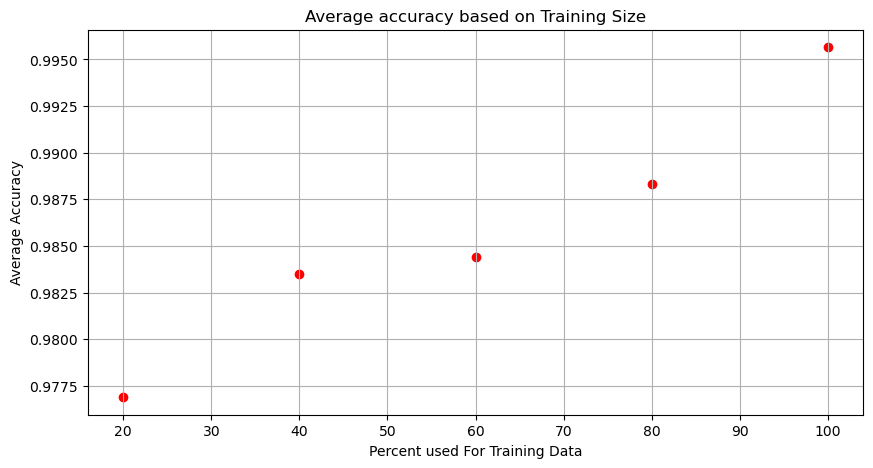

In [44]:
#plotting averages:

#variables:
percent_data = [20, 40, 60, 80, 100] #including each percentage datapoint that I considered 
average = [average20, average40, average60, average80, average100] #all the averages for each percentage

#configuring plot:
plt.figure(figsize=(10, 5)) #size of chart diplayed 
plt.scatter(percent_data, average, color='red', marker='o') #creates dot scatter plot with percentages on x axis and averages on y axis
plt.xlabel('Percent used For Training Data') #labels x axis 
plt.ylabel('Average Accuracy') #labels y axis 
plt.title('Average accuracy based on Training Size') #labels title 
plt.grid(True) #adds grid 
plt.show() 

# Result: More data results in higher average accuracy scores, however, it is important to avoid using all the data as training data because it is possible the model will overfit the data and be unable to replicate the same accuracy on a test set. More data is better as long as there is a sufficient amount of data left over for the testing set. 